In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
cv2.__version__

'3.1.0'

True

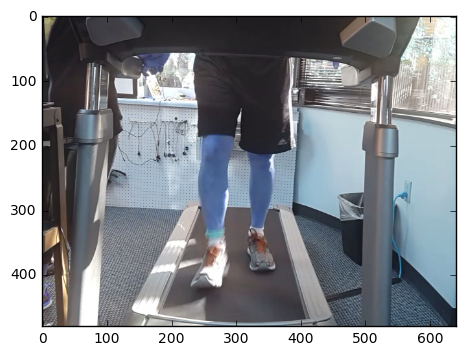

enter x coordinates for histogram (q to Quit): 330
enter x coordinates for histogram (q to Quit): 340
enter x coordinates for histogram (q to Quit): 350
enter x coordinates for histogram (q to Quit): q


'q'

True

KeyboardInterrupt: 

In [23]:
def getPoint(x,y,img):
    temp = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return temp[x,y]


def getLineSegment(x1,x2,y,img):
    temp = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return temp[x1:x2,y]

%matplotlib inline

frameOffset = 300
cap = cv2.VideoCapture('test.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES,frameOffset)
ret,frame = cap.read()
plt.imshow(frame)
plt.show()
cap.release()
y = 0
yList = []
while y!='q':
    y = input('enter x coordinates for histogram (q to Quit): ')
    yList.append(y)
yList.pop()
yList = [int(i) for i in yList]



x1 = 300
x2 = 470

cap = cv2.VideoCapture('test.mp4')
cap.set(cv2.CAP_PROP_POS_FRAMES,0)

ret,frame = cap.read()
pixel = getLineSegment(x1,x2,yList[0],frame) 
buffer = np.tile(pixel, [2,1])


while cap.isOpened():
    ret,frame = cap.read()
    for y in yList:
        new = getLineSegment(x1,x2,y,frame) 
        buffer = np.append(buffer, np.resize(new, [1,new.size]), axis=0)    

cap.release()



In [74]:
# deinterleave buffers
numBuff = len(yList)
buf1 = buffer[0::numBuff]
buf2 = buffer[1::numBuff]
buf3 = buffer[2::numBuff]
buf1 = buf1[0:-1]
buf2 = buf2[0:-1]

buf1.shape
buf2.shape
buf3.shape

buf = (buf1>90)+(buf2>90)+(buf3>90)
out = np.sum(buf, axis=1)

(10310, 170)

(10310, 170)

(10310, 170)

In [92]:
# %matplotlib notebook
# plt.figure(figsize=[12,100])
# plt.imshow((buf1>90)+(buf2>90)+(buf3>90));
# plt.colorbar();

<IPython.core.display.Javascript object>


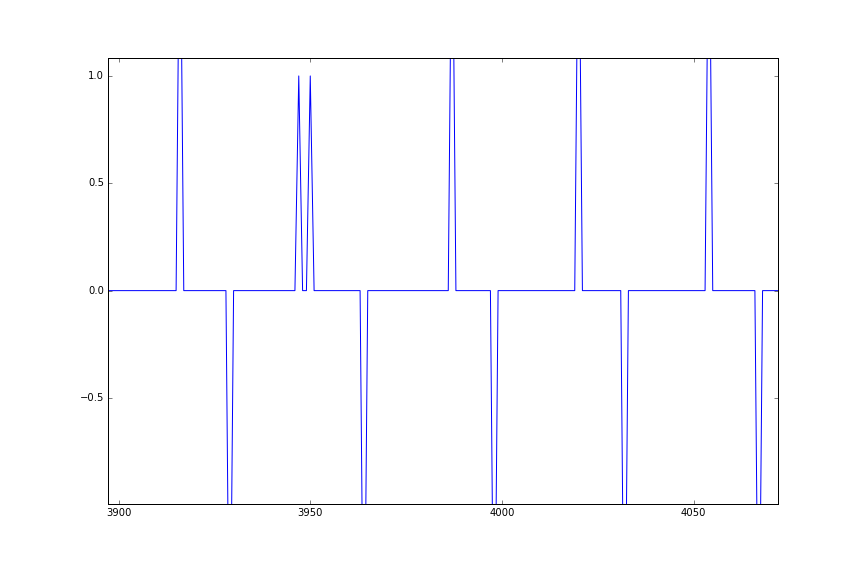

In [90]:
%matplotlib notebook
plt.figure(figsize=[12,8])
plt.plot(ddy);

# plt.plot(buffer[450:1000,150])
# plt.plot(buffer[450:1000,160])
# plt.plot(buffer[450:1000,169])




In [80]:
N=10
Fc=40
Fs=1600
import scipy.signal as sp

# provide them to firwin
h=sp.firwin( numtaps=N, cutoff=40, nyq=Fs/2)

y=sp.lfilter( h, 1.0, out) # 'x' is the time-series data you are filtering



dy = np.diff(y)
dy[dy>0] = 1
dy[dy<0] = -1
ddy = np.diff(dy)
ddy[ddy>0] = 0
np.count_nonzero(ddy)